In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_csv('exp7_data.csv')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [10]:

print("Shape of X (features):", data.iloc[:, :-2].shape)
print("Shape of Y (targets):", data.iloc[:, -2:].shape)


Shape of X (features): (768, 8)
Shape of Y (targets): (768, 2)


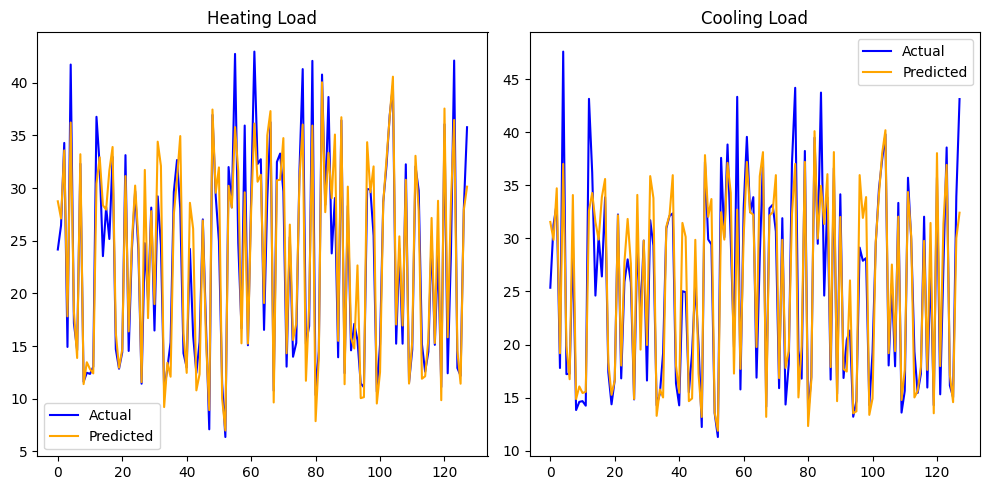

Overall relative prediction error: 0.13021187164767753


In [11]:

X = data.iloc[:, :-2].values
Y = data.iloc[:, -2:].values

rand_state = 2
np.random.seed(rand_state)
r = np.random.permutation(len(X))
X_train, X_test = X[r[128:]], X[r[:128]]
Y_train, Y_test = Y[r[128:]], Y[r[:128]]

# Sorting test data to ensure output values increase when graphed as curves
mean_Y_test = np.mean(Y_test, axis=0)
sorted_indices = np.argsort(mean_Y_test)
X_test_sorted = X_test[:, sorted_indices]
Y_test_sorted = Y_test[:, sorted_indices]

# Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predicting on test set
Y_pred = model.predict(X_test)

# Computing relative prediction error
error = np.linalg.norm(Y_test - Y_pred) / np.linalg.norm(Y_test)

# Plotting comparison between actual and predicted values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(Y_test[:, 0], label='Actual', color='blue')
plt.plot(Y_pred[:, 0], label='Predicted', color='orange')
plt.title('Heating Load')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Y_test[:, 1], label='Actual', color='blue')
plt.plot(Y_pred[:, 1], label='Predicted', color='orange')
plt.title('Cooling Load')
plt.legend()

plt.tight_layout()
plt.show()

print("Overall relative prediction error:", error)
